In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
PATH = '/data/hawfinch/clarkson/data/us_eq/cache' 

In [57]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

In [58]:
idx = pd.IndexSlice
t = df.loc['2019-01-01':'2019-07-19'].dropna(axis=1)
# print(t.columns[t])
data = df.loc['2019-01-01':'2019-07-19'].dropna(axis=1)

In [128]:
cov_matrix = data.apply(lambda x: x / x.std()).cov()
cov_matrix

ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,PRSP,PBY,ARLO,KLXE,GTX,LTHM,SWI,REZI,ETRN,ACA
ticker,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,0.475914,0.445664,0.408605,0.179879,0.421166,0.370088,0.230450,0.240506,0.195396,...,0.287686,0.285129,0.121076,0.544659,0.313416,0.378942,0.332028,0.319248,0.337255,0.269882
AABA,0.475914,1.000000,0.356507,0.690714,0.184613,0.390787,0.369566,0.307890,0.361597,0.236109,...,0.238101,0.130718,0.115042,0.391669,0.260711,0.364935,0.415782,0.391457,0.297612,0.205760
AAON,0.445664,0.356507,1.000000,0.375317,0.281126,0.419049,0.393650,0.203802,0.324839,0.318720,...,0.304782,0.179614,0.105381,0.376268,0.309068,0.261792,0.312125,0.334872,0.325300,0.322918
AAPL,0.408605,0.690714,0.375317,1.000000,0.185748,0.244683,0.320678,0.286355,0.406274,0.299443,...,0.328104,0.162691,0.172540,0.377133,0.323562,0.283797,0.412421,0.353059,0.262206,0.153100
ABC,0.179879,0.184613,0.281126,0.185748,1.000000,0.300741,0.329803,0.281020,0.261770,0.289088,...,0.242438,0.049502,0.035346,0.175676,0.157332,0.213667,0.199563,0.215511,0.080078,0.140521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTHM,0.378942,0.364935,0.261792,0.283797,0.213667,0.299591,0.282876,0.172459,0.080023,0.166513,...,0.120937,0.085131,0.057717,0.370107,0.241913,1.000000,0.153164,0.291077,0.169893,0.180954
SWI,0.332028,0.415782,0.312125,0.412421,0.199563,0.245179,0.359003,0.327466,0.380225,0.168069,...,0.353859,0.101490,0.144049,0.250030,0.308821,0.153164,1.000000,0.286959,0.290425,0.221614
REZI,0.319248,0.391457,0.334872,0.353059,0.215511,0.387920,0.536130,0.149570,0.247553,0.190738,...,0.288144,0.187360,0.132898,0.421809,0.206903,0.291077,0.286959,1.000000,0.130114,0.208965


In [129]:
w, v = np.linalg.eigh(cov_matrix)

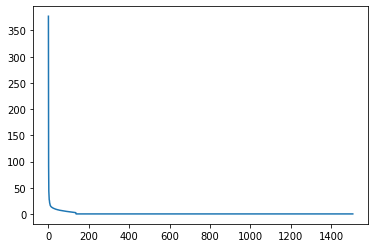

In [131]:
plt.plot([w for w in reversed(w)])

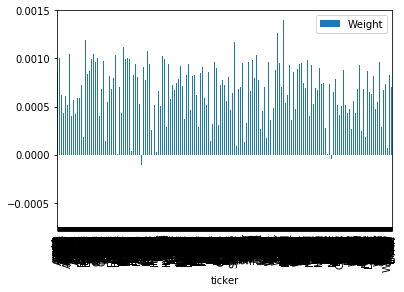

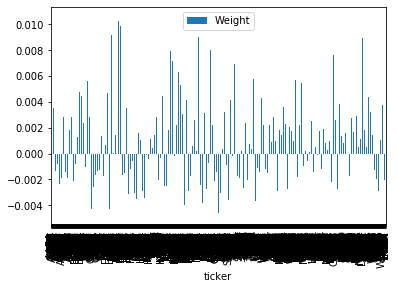

In [136]:
normalise = lambda x: x / np.sum(x)
eig_1 = pd.DataFrame(normalise(v[:,-1]), index=data.columns, columns=['Weight'])
eig_2 = pd.DataFrame(normalise(v[:,-2]), index=data.columns, columns=['Weight'])
ax = plt
eig_1.plot(kind='bar')
eig_2.plot(kind='bar')